Laura Michel Bolivar Rincon

La dataset seleccionada corresponde al movimiento del oro apartir del 28 septiembre 2000 hasta 24 septiembre 2021

##Importar Librerias 

In [178]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans   #Conversio de datos 
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D

import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Importando Dataset

In [179]:
df = pd.read_csv("https://raw.githubusercontent.com/michelBolivar/Deep_learning/main/Corte1/trabajo_primer_corte/dataset_oro.csv")
df.head(20)

,Fecha,Abrir,Max,Min,Cierre,Volumen
0,24-09-2021,1749.7,1749.7,1745.0,1749.70,31.0
1,23-09-2021,1766.8,1766.8,1738.2,1747.70,31.0
2,22-09-2021,1776.7,1784.3,1767.0,1776.70,17.0
3,21-09-2021,1762.2,1776.0,1759.0,1776.00,106.0
4,20-09-2021,1751.8,1761.8,1750.9,1761.80,185.0
5,17-09-2021,1758.8,1763.0,1749.4,1749.40,581.0
6,16-09-2021,1792.9,1792.9,1743.9,1754.60,1645.0
7,15-09-2021,1803.7,1803.7,1792.4,1792.40,59.0
8,14-09-2021,1791.4,1806.2,1783.0,1804.70,764.0
9,13-09-2021,1789.8,1796.0,1784.0,1792.00,533.0


##Conociendo y Preparando los datos 

Numero de columnas y filas 

In [180]:
df.shape

(5348, 6)

Informacion 

In [181]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5348 entries, 0 to 5347
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    5348 non-null   object 
 1   Abrir    5237 non-null   float64
 2   Max      5237 non-null   float64
 3   Min      5237 non-null   float64
 4   Cierre   5237 non-null   object 
 5   Volumen  4270 non-null   float64
dtypes: float64(4), object(2)
memory usage: 250.8+ KB


Verficando datos nulos

In [183]:
#df.describe()
df.isnull().sum()

Fecha         0
Abrir       111
Max         111
Min         111
Cierre      111
Volumen    1078
dtype: int64

Eliminando filas Vacias

In [184]:
df = df.dropna()
df= df.reset_index(drop=True)

Cambiando el tipo de dato en columnas 

In [185]:
df.head(11)

,Fecha,Abrir,Max,Min,Cierre,Volumen
0,24-09-2021,1749.7,1749.7,1745.0,1749.70,31.0
1,23-09-2021,1766.8,1766.8,1738.2,1747.70,31.0
2,22-09-2021,1776.7,1784.3,1767.0,1776.70,17.0
3,21-09-2021,1762.2,1776.0,1759.0,1776.00,106.0
4,20-09-2021,1751.8,1761.8,1750.9,1761.80,185.0
5,17-09-2021,1758.8,1763.0,1749.4,1749.40,581.0
6,16-09-2021,1792.9,1792.9,1743.9,1754.60,1645.0
7,15-09-2021,1803.7,1803.7,1792.4,1792.40,59.0
8,14-09-2021,1791.4,1806.2,1783.0,1804.70,764.0
9,13-09-2021,1789.8,1796.0,1784.0,1792.00,533.0


Definiendo las columnas que usaremos para el ejercicio

In [190]:
df_2= df[['Cierre','Volumen','Abrir','Max','Min']]
df_2.head()

,Cierre,Volumen,Abrir,Max,Min
0,1749.70,31.0,1749.7,1749.7,1745.0
1,1747.70,31.0,1766.8,1766.8,1738.2
2,1776.70,17.0,1776.7,1784.3,1767.0
3,1776.00,106.0,1762.2,1776.0,1759.0
4,1761.80,185.0,1751.8,1761.8,1750.9


##Normalizacion de Datos

In [191]:
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_2)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Cierre', 1: 'Volumen'})

In [192]:
df_escalado.head()
df_escalado.isnull().sum()

Cierre     0
Volumen    0
2          0
3          0
4          0
dtype: int64

##Normalización de los datos usando como base la fecha 

**Rangos de fecha semanales**

*   W - para datos semanales
*   M - para datos mensuales
*   Q - para el trimestre
*   A - por año

In [134]:
df['Fecha'] = pd.to_datetime(df['Fecha']) #Convertimos el campo fecha en tipo fecha
df = df.set_index('Fecha') 
weekly_summary = df.resample('W').sum()  #Separar por rangos de fechas 
df.head()

,Abrir,Cierre,Volumen
Fecha,,,
2021-09-24,1749.70,1749.70,31
2021-09-23,1766.80,1747.70,31
2021-09-22,1776.70,1776.70,17
2021-09-21,1762.20,1776.00,106
2021-09-20,1751.80,1761.80,185


Como se puede observar clasifico el rango de fechas por semanas 

##Representación gráfica de los datos

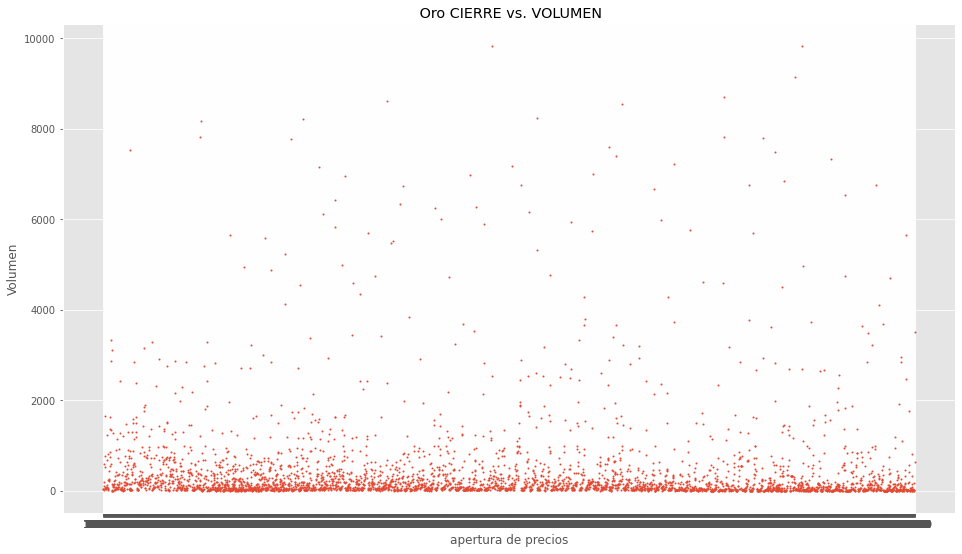

In [188]:
#%% Representación gráfica de los datos.
x = df['Cierre'].values
y = df['Volumen'].values
plt.xlabel('apertura de precios')
plt.ylabel('Volumen')
plt.title(' Oro CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=1)

#Aplicacion de K-means

##Realizar una gráfica elbow o de codo

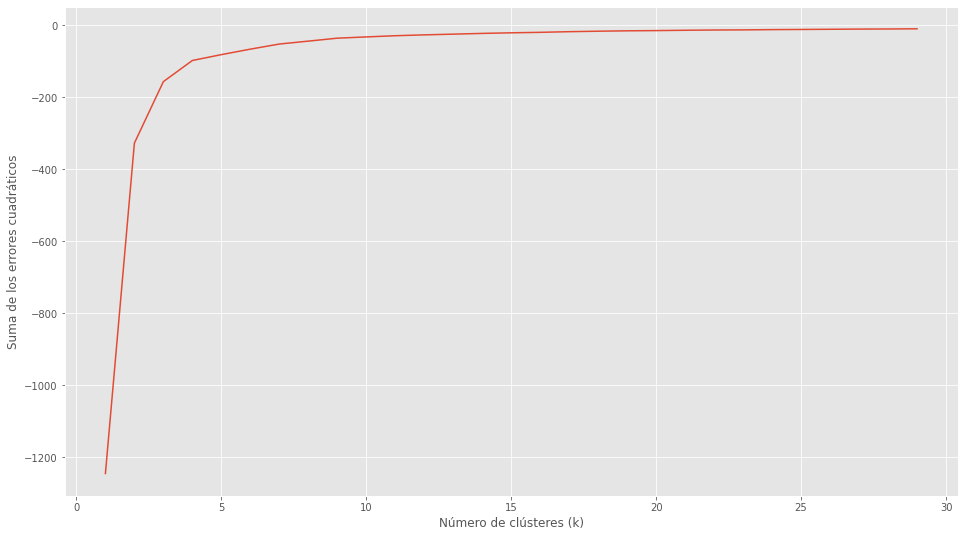

In [195]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

##Aplicar el algoritmo de k-mean

In [196]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.069707   0.03426072 0.06994515 0.06946532 0.06943034]
 [0.55848018 0.02739763 0.56043922 0.55802274 0.55860392]
 [0.80488491 0.03850411 0.8077723  0.80517235 0.80418347]
 [0.30257419 0.02654722 0.30377563 0.30335092 0.3015761 ]
 [0.54789385 0.59735154 0.54915493 0.54871493 0.54549464]]


##Etiquetado de Datos

In [201]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels

##Representación gráfica de los clústeres k-means.¶


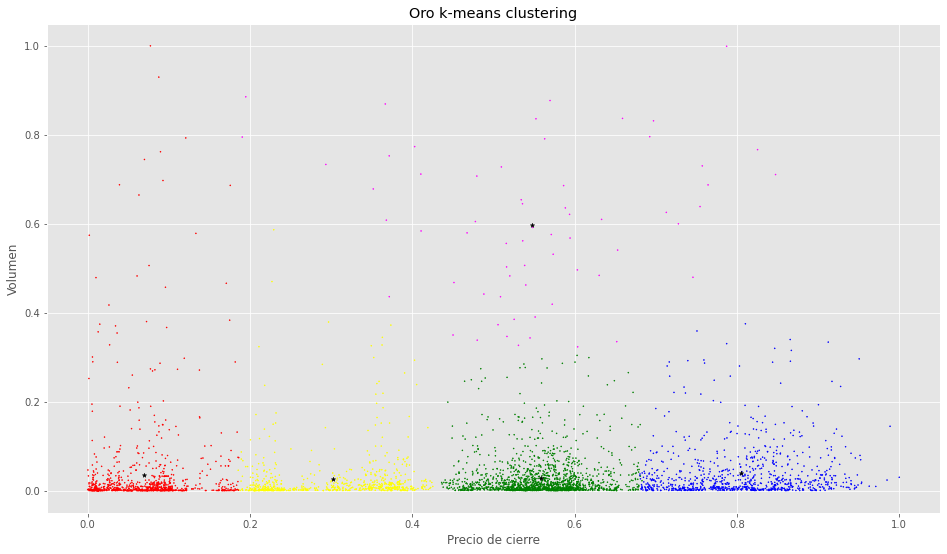

In [203]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Oro k-means clustering')
plt.show()

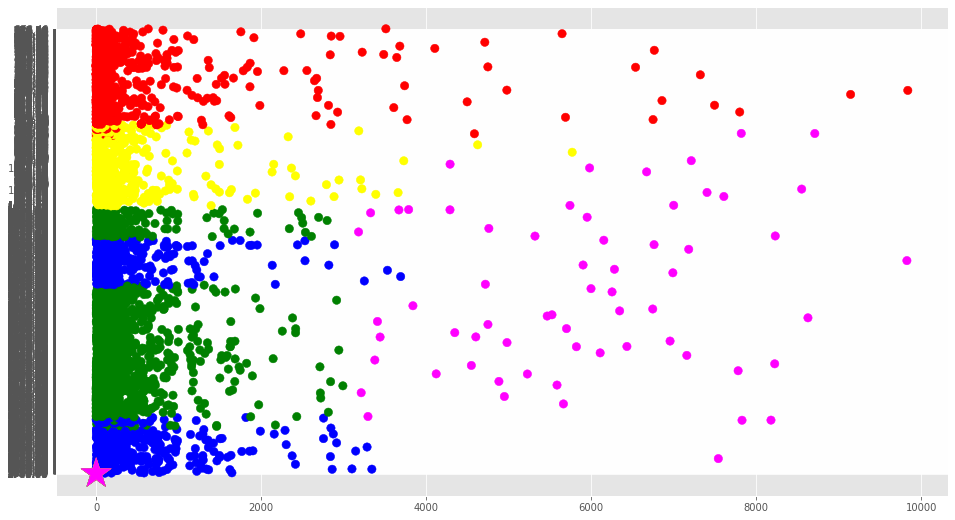

In [206]:
f1 = df['Volumen'].values
f2 = df['Cierre'].values
C = kmeans.cluster_centers_
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()